# WeatherPy

In [26]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
from scipy.stats import linregress
from config import weather_api_key
from config import g_key
from citipy import citipy
from pprint import pprint


## Generate Cities List

In [2]:
lat = np.random.uniform(low = -90.000, high = 90.000, size = 100 )
lng = np.random.uniform(low = -180.000, high = 180.000, size = 100)
coordinates = zip(lat, lng)

city_list = []

for lat_long in coordinates:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    if city not in city_list:
        city_list.append(city)    

print(f'There are {len(city_list)} cities in the generated list.')

There are 89 cities in the generated list.


### Perform API Calls

In [36]:
act_city_name = []
country = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
lattitude = []
longitude = []
date = []

temp_units = "imperial"
city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

record_counter = 0
set_counter = 1

for city_name in city_list:
    query = (city_url + city_name)
    response = requests.get(query).json()
    record_counter += 1
#     pprint(response)
    
    try:
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lattitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lat'])
        act_city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_counter > 50:
            record_counter = 1
            set_counter += 1
            
        print(f'Processing record {record_counter} of set {set_counter} | {city_name}.')
    
    except:
        record_counter -= 1
        print(f'City not found. Skipping...')
print('----------------------------------')
print('Data Retrieval Complete')
print('----------------------------------')


Processing record 1 of set 1 | san jose.
Processing record 2 of set 1 | puerto ayora.
Processing record 3 of set 1 | albany.
Processing record 4 of set 1 | port-gentil.
Processing record 5 of set 1 | vaini.
Processing record 6 of set 1 | ape.
Processing record 7 of set 1 | jamestown.
Processing record 8 of set 1 | ankazobe.
City not found. Skipping...
Processing record 9 of set 1 | meulaboh.
City not found. Skipping...
City not found. Skipping...
Processing record 10 of set 1 | ketchikan.
Processing record 11 of set 1 | ulaangom.
Processing record 12 of set 1 | chara.
Processing record 13 of set 1 | mar del plata.
Processing record 14 of set 1 | chuy.
Processing record 15 of set 1 | qaanaaq.
Processing record 16 of set 1 | nikolskoye.
Processing record 17 of set 1 | mataura.
Processing record 18 of set 1 | bougouni.
Processing record 19 of set 1 | alofi.
Processing record 20 of set 1 | port elizabeth.
Processing record 21 of set 1 | marsh harbour.
Processing record 22 of set 1 | port b

## Convert Raw Data to DataFrame

In [57]:
# Create DataFrame
geo_weather_data_df = pd.DataFrame({
    'City' : act_city_name,
    'Lat' : lattitude,
    'Lng' : longitude,
    'Max Temp' : temperature,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
})

# Add a column for hemisphere
def get_hemisphere(row):
    
    lattitude = row[2]    
    if lattitude >= 0:
        return "Northern Hemisphere"
    else:
        return "Southern Hemisphere"

# Call the get_hemisphere function to append a new Hemisphere column to the dataframe
geo_weather_data_df["Hemisphere"] = geo_weather_data_df.apply(get_hemisphere, axis="columns")

# Export city data to a .csv
geo_weather_data_df.to_csv("Raw City Weather Data.csv")

# Display the dataframe
geo_weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,San Jose,37.34,37.34,68.00,72,20,1.63,US,1601188655,Northern Hemisphere
1,Puerto Ayora,-0.74,-0.74,69.01,88,41,4.00,EC,1601188918,Southern Hemisphere
2,Albany,42.60,42.60,68.00,98,42,5.53,US,1601188918,Northern Hemisphere
3,Port-Gentil,-0.72,-0.72,77.00,83,40,11.41,GA,1601188918,Southern Hemisphere
4,Vaini,-21.20,-21.20,71.60,83,20,8.05,TO,1601188919,Southern Hemisphere


### Inspect the data and remove the cities where the humidity > 100%

In [38]:
# Create a dataframe that shows the max humidity
geo_weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,82.00000,82.00000,82.000000,82.000000,82.000000,82.000000,8.200000e+01
mean,13.82878,13.82878,62.114512,76.121951,49.121951,8.474878,1.601189e+09
std,39.63163,39.63163,17.924989,16.793143,39.525704,4.639324,7.083700e+01
min,-54.80000,-54.80000,11.710000,13.000000,0.000000,0.850000,1.601189e+09
25%,-20.90500,-20.90500,47.177500,67.000000,2.750000,5.140000,1.601189e+09
50%,11.21000,11.21000,62.305000,81.000000,45.500000,7.975000,1.601189e+09
75%,53.38500,53.38500,77.947500,87.000000,90.000000,10.907500,1.601189e+09
max,77.48000,77.48000,95.990000,100.000000,100.000000,20.800000,1.601189e+09


In [52]:
# Make a new DataFrame after dropping all cities with humidity > 100
clean_city_data = geo_weather_data_df[geo_weather_data_df["Humidity"]<=100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,San Jose,37.34,37.34,68.00,72,20,1.63,US,1601188655,Northern Hemisphere
1,Puerto Ayora,-0.74,-0.74,69.01,88,41,4.00,EC,1601188918,Southern Hemisphere
2,Albany,42.60,42.60,68.00,98,42,5.53,US,1601188918,Northern Hemisphere
3,Port-Gentil,-0.72,-0.72,77.00,83,40,11.41,GA,1601188918,Southern Hemisphere
4,Vaini,-21.20,-21.20,71.60,83,20,8.05,TO,1601188919,Southern Hemisphere


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

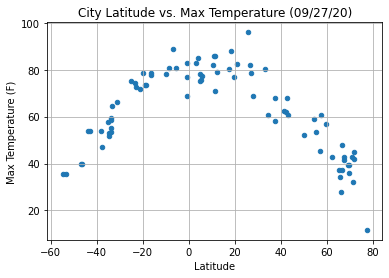

In [40]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)
date_of_analysis = '09/27/20'
plt.title(f'City Latitude vs. Max Temperature ({date_of_analysis})')
plt.ylabel(f"Max Temperature (F)")
plt.xlabel(f'Latitude')

### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

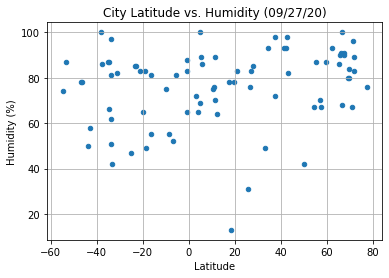

In [41]:
clean_city_data.plot(kind="scatter", x='Lat', y='Humidity', grid=True)
plt.title(f'City Latitude vs. Humidity ({date_of_analysis})')
plt.ylabel(f'Humidity (%)')
plt.xlabel(f'Latitude')

### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

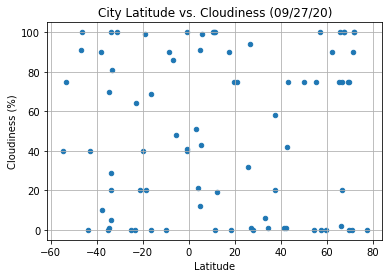

In [42]:
clean_city_data.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True)
plt.title(f'City Latitude vs. Cloudiness ({date_of_analysis})')
plt.ylabel(f'Cloudiness (%)')
plt.xlabel(f'Latitude')

### Latitude vs. Wind Speed

Text(0.5, 0, 'Latitude')

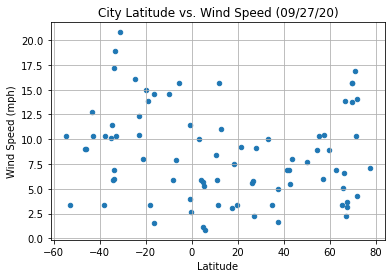

In [43]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True)
plt.title(f'City Latitude vs. Wind Speed ({date_of_analysis})')
plt.ylabel(f'Wind Speed (mph)')
plt.xlabel(f'Latitude')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9092601781770614


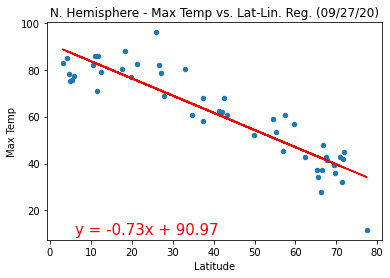

In [65]:
# Filter the DataFrame for only the Northern Hemisphere cities
hem_fil = clean_city_data["Hemisphere"] == "Northern Hemisphere"
north_hem_city_data = clean_city_data[hem_fil]

north_hem_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=False)
x_values = north_hem_city_data["Lat"]
y_values = north_hem_city_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.title(f'N. Hemisphere - Max Temp vs. Lat-Lin. Reg. ({date_of_analysis})')
print(f'The r-value is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.9109044873497995


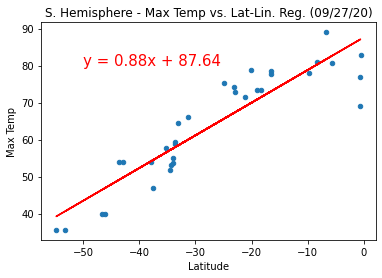

In [69]:
# Filter the DataFrame for only the Southern Hemisphere cities
hem_fil = clean_city_data["Hemisphere"] == "Southern Hemisphere"
south_hem_city_data = clean_city_data[hem_fil]

south_hem_city_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=False)
x_values = south_hem_city_data["Lat"]
y_values = south_hem_city_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.title(f'S. Hemisphere - Max Temp vs. Lat-Lin. Reg. ({date_of_analysis})')
print(f'The r-value is: {rvalue}')